In [ ]:
import torch
from torchvision.models import alexnet
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import tarfile
from urllib.request import urlretrieve
import os

file_url = "https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz"
file_name = "imagenette2-160.tgz"

if not os.path.exists(file_name):
    urlretrieve(file_url, file_name)

with tarfile.open(file_name, 'r:gz') as tar:
    tar.extractall()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = datasets.ImageFolder(root='imagenette2-160/train', transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.ImageFolder(root='imagenette2-160/val', transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

model = alexnet(weights=None)

num_classes = len(train_dataset.classes)
model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 200 
save_interval = 2  

for epoch in range(num_epochs):
    model.train()

    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Training - Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')


    model.eval()
    test_loss = 0.0
    correct = 0
    
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()  # Dodaj do sumy
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
    

    average_test_loss = test_loss / len(test_dataloader.dataset)
    accuracy = correct / len(test_dataloader.dataset) * 100
    
    print(f'Testing - Epoch {epoch+1}/{num_epochs}, Loss: {average_test_loss}, Accuracy: {accuracy}%')

    if (epoch + 1) % save_interval == 0:
        torch.save(model.state_dict(), f'alexnet_model_epoch_{epoch+1}.pth')

print("Training complete.")


Training - Epoch 1/200, Loss: 2.303715705871582
Testing - Epoch 1/200, Loss: 0.03636651057346611, Accuracy: 9.095541401273884%
Training - Epoch 2/200, Loss: 2.2990503311157227
Testing - Epoch 2/200, Loss: 0.03634827133956229, Accuracy: 9.095541401273884%
Training - Epoch 3/200, Loss: 2.2939257621765137
Testing - Epoch 3/200, Loss: 0.036302065454470886, Accuracy: 10.012738853503185%
Training - Epoch 4/200, Loss: 2.2854321002960205
Testing - Epoch 4/200, Loss: 0.0360939298617612, Accuracy: 10.853503184713375%
Training - Epoch 5/200, Loss: 2.2224411964416504
Testing - Epoch 5/200, Loss: 0.03526542967292154, Accuracy: 20.458598726114648%


In [29]:
model = alexnet(weights=None)
num_classes = 10
model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes)
model.load_state_dict(torch.load('alexnet_model_epoch_60.pth'))
model.eval()

Normalized weights of the first filter:
[[[-0.5916693  -0.8441809   0.63825107  0.3392018  -0.8301194
   -0.5445833  -0.4848768   0.1534754  -0.45322788  0.48375416
   -0.52359366]
  [-0.06222636  0.30998886  0.4084779   0.9026673  -0.5610233
    0.06764829 -0.77000815 -0.5736228  -0.66755325  0.3273679
   -0.18735754]
  [ 0.6860348   0.5298419   0.24782157  0.8122225   0.6843027
    0.4775939  -0.6365199  -0.51487505  0.16016674 -0.26676995
   -0.39956826]
  [ 0.27457845 -0.09349865  0.00186205  0.7079339   0.64340806
    0.1298747   0.5138141   0.2532128  -0.70830023 -0.6062075
   -0.58859086]
  [-0.89564186 -0.42260355 -0.8253741  -0.45155108 -0.60277414
   -0.6603742   0.20133162  0.25727284 -0.14486986 -0.4768725
   -0.04105902]
  [-0.05170083  0.5145799  -0.6950511  -0.7256609   0.4673673
   -1.         -0.41758978 -0.29362917  0.07861483 -0.27124625
    0.3872528 ]
  [-0.8596469   0.11108112 -0.19986218 -0.4784668  -0.1207881
   -0.55517435  0.08611333 -0.66413224 -0.4772939  -0

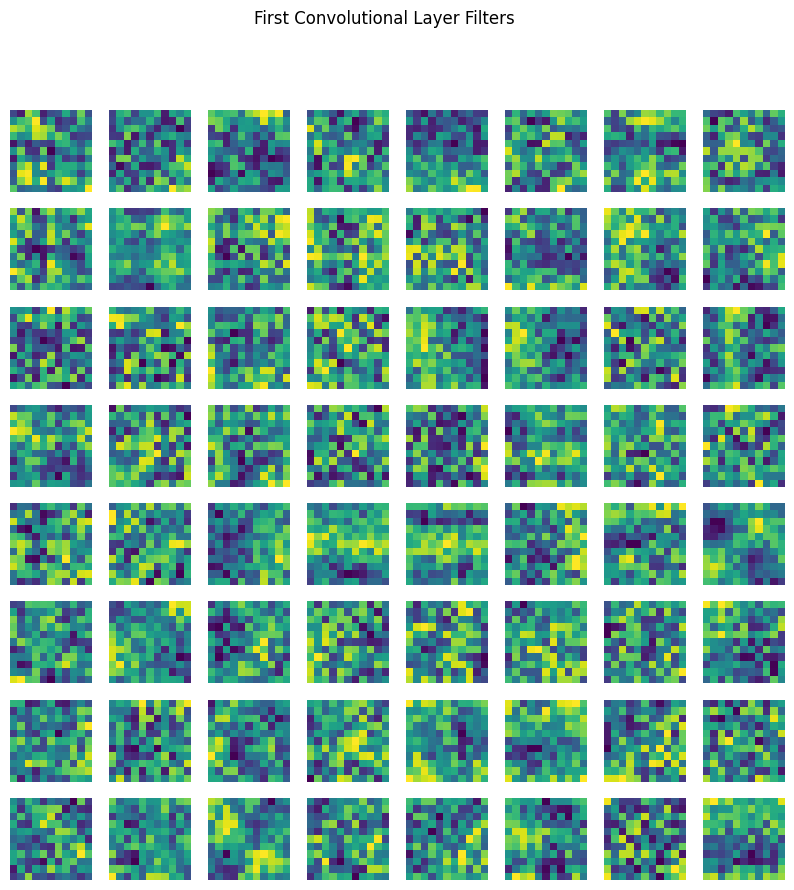

In [57]:
first_conv_layer = next(layer for layer in model.features if isinstance(layer, torch.nn.Conv2d))

# Visualize filters for the first convolutional layer
filters = first_conv_layer.weight.data.numpy()
filters = filters / filters.max()  # Normalize for better visualization

# Plot the filters
plt.figure(figsize=(10, 10))
for j in range(filters.shape[0]):
    plt.subplot(8, 8, j + 1)
    plt.imshow(filters[j, 0, :, :], cmap='viridis')
    plt.axis('off')
plt.suptitle('First Convolutional Layer Filters')
plt.show()

In [30]:
# Extract the first convolutional layer
first_conv_layer = next(layer for layer in model.features if isinstance(layer, torch.nn.Conv2d))

# Visualize filters for the first convolutional layer
filters = first_conv_layer.weight.data.numpy()
filters = filters / filters.max()  # Normalize for better visualization


first_filter_weights = first_conv_layer.weight[0].data.numpy()

# Normalize the weights to the range [-1, 1]
normalized_weights = 2 * (first_filter_weights - first_filter_weights.min()) / (first_filter_weights.max() - first_filter_weights.min()) - 1

# Print the normalized weights of the first filter
print("Normalized weights of the first filter:")
print(normalized_weights)



Normalized weights of the first filter:
[[[-0.5916693  -0.8441809   0.63825107  0.3392018  -0.8301194
   -0.5445833  -0.4848768   0.1534754  -0.45322788  0.48375416
   -0.52359366]
  [-0.06222636  0.30998886  0.4084779   0.9026673  -0.5610233
    0.06764829 -0.77000815 -0.5736228  -0.66755325  0.3273679
   -0.18735754]
  [ 0.6860348   0.5298419   0.24782157  0.8122225   0.6843027
    0.4775939  -0.6365199  -0.51487505  0.16016674 -0.26676995
   -0.39956826]
  [ 0.27457845 -0.09349865  0.00186205  0.7079339   0.64340806
    0.1298747   0.5138141   0.2532128  -0.70830023 -0.6062075
   -0.58859086]
  [-0.89564186 -0.42260355 -0.8253741  -0.45155108 -0.60277414
   -0.6603742   0.20133162  0.25727284 -0.14486986 -0.4768725
   -0.04105902]
  [-0.05170083  0.5145799  -0.6950511  -0.7256609   0.4673673
   -1.         -0.41758978 -0.29362917  0.07861483 -0.27124625
    0.3872528 ]
  [-0.8596469   0.11108112 -0.19986218 -0.4784668  -0.1207881
   -0.55517435  0.08611333 -0.66413224 -0.4772939  -0

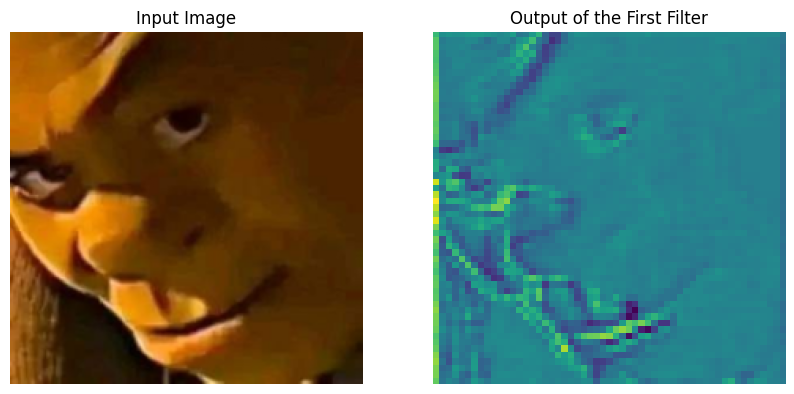

In [35]:
import numpy as np

image_path = 'shrek.jpg'
image = Image.open(image_path).convert('RGB')
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add batch dimension

# Extract the first convolutional layer
first_conv_layer = next(layer for layer in model.features if isinstance(layer, torch.nn.Conv2d))

# Forward pass through the first convolutional layer
with torch.no_grad():
    output = first_conv_layer(input_batch)

# Convert the output tensor to a numpy array
output_np = output[0, 0].numpy()

# Plot the input image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.transpose(input_tensor.numpy(), (1, 2, 0)))
plt.title('Input Image')
plt.axis('off')

# Plot the output of the first filter
plt.subplot(1, 2, 2)
plt.imshow(output_np, cmap='viridis')
plt.title('Output of the First Filter')
plt.axis('off')

plt.show()

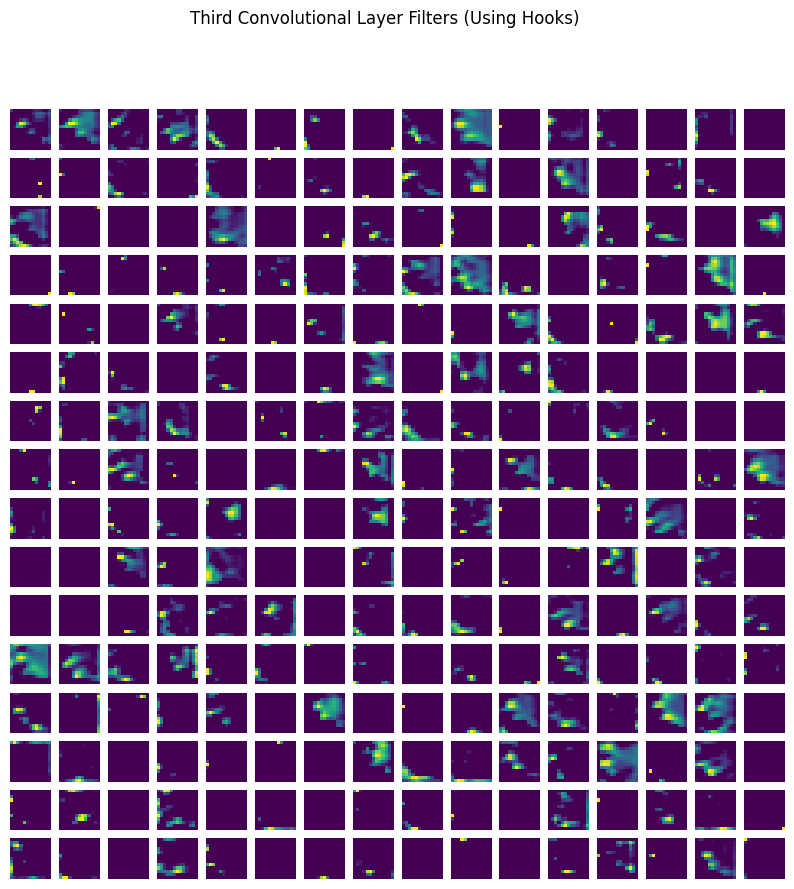

In [93]:

import torch
import torchvision.models as models
import matplotlib.pyplot as plt


third_conv_layer = model.features[10]

# Initialize a list to store the filters
filters_list = []

# Define a forward hook to extract filters
def hook_fn(module, input, output):
    filters_list.append(output.data.cpu().numpy())

# Register the hook on the third convolutional layer
hook_handle = third_conv_layer.register_forward_hook(hook_fn)

# Load and preprocess an example image
image_path = 'shrek.jpg'
image = Image.open(image_path).convert('RGB')
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(image).unsqueeze(0)

# Forward pass to trigger the hook and extract filters
with torch.no_grad():
    model(input_tensor)

# Remove the hook to avoid interference with future forward passes
hook_handle.remove()

# Normalize the filters for better visualization
filters = filters_list[0] / filters_list[0].max()

# Determine the number of rows and columns based on the number of filters
num_filters = filters.shape[1]
num_rows = int(num_filters**0.5)
num_cols = (num_filters + num_rows - 1) // num_rows

# Plot the filters
plt.figure(figsize=(10, 10))
for j in range(num_filters):
    plt.subplot(num_rows, num_cols, j + 1)
    plt.imshow(filters[0, j, :, :], cmap='viridis')
    plt.axis('off')
plt.suptitle('Third Convolutional Layer Filters (Using Hooks)')
plt.show()

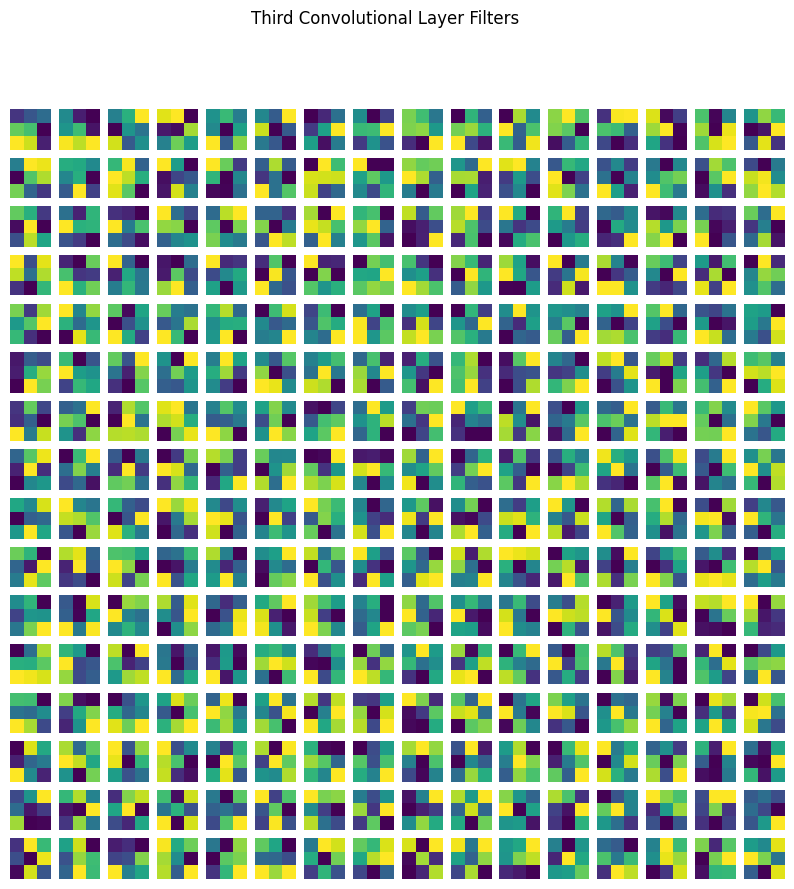

In [72]:
# Extract the third convolutional layer
third_conv_layer = model.features[10]

# Visualize filters for the third convolutional layer
filters = third_conv_layer.weight.data.numpy()
filters = filters / filters.max()  # Normalize for better visualization

# Determine the number of rows and columns based on the number of filters
num_filters = filters.shape[0]
num_rows = int(num_filters**0.5)
num_cols = (num_filters + num_rows - 1) // num_rows

# Plot the filters
plt.figure(figsize=(10, 10))
for j in range(num_filters):
    plt.subplot(num_rows, num_cols, j + 1)
    plt.imshow(filters[j, 0, :, :], cmap='viridis')
    plt.axis('off')
plt.suptitle('Third Convolutional Layer Filters')
plt.show()

In [77]:

print(model.features[10])

Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


Normalized weights of the first filter:
[[-0.6877588  -0.4612913  -0.29505026]
 [ 0.5269735   0.4092505  -1.        ]
 [ 1.          0.845562   -0.821282  ]]


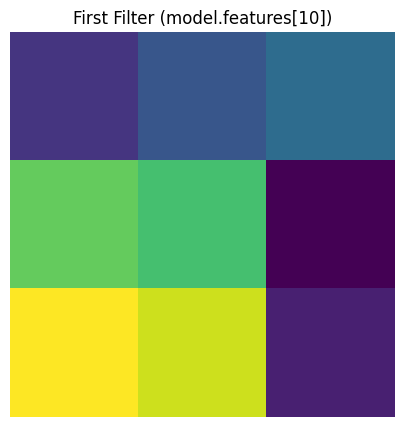

In [86]:
conv_layer = model.features[10]

# Visualize the weights for the first filter of the convolutional layer
first_filter_weights = conv_layer.weight[0, 0].data.numpy()

# Normalize the weights to the range [-1, 1]
normalized_weights = 2 * (first_filter_weights - first_filter_weights.min()) / (first_filter_weights.max() - first_filter_weights.min()) - 1

# Print the normalized weights of the first filter
print("Normalized weights of the first filter:")
print(normalized_weights)

# Plot the first filter
plt.figure(figsize=(5, 5))
plt.imshow(normalized_weights, cmap='viridis')
plt.axis('off')
plt.title('First Filter (model.features[10])')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


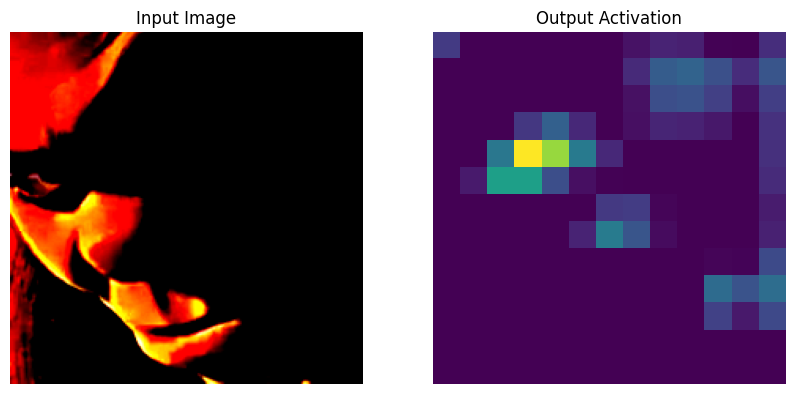

In [92]:
conv_layer = model.features[10]

# Define a forward hook to capture the intermediate feature maps
activation = None
def hook_fn(module, input, output):
    global activation
    activation = output.detach()

# Register the hook on the convolutional layer
hook_handle = conv_layer.register_forward_hook(hook_fn)

# Load and preprocess an example image
image_path = 'shrek.jpg'
image = Image.open(image_path).convert('RGB')
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(image).unsqueeze(0)

# Forward pass to trigger the hook and capture the intermediate feature maps
with torch.no_grad():
    model(input_tensor)

# Remove the hook to avoid interference with future forward passes
hook_handle.remove()

# Visualize the output after passing through the single filter
output_activation = activation[0, 0].numpy()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_tensor.squeeze().permute(1, 2, 0), cmap='viridis')
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_activation, cmap='viridis')
plt.title('Output Activation')
plt.axis('off')

plt.show()